<a href="https://colab.research.google.com/github/athens-21/DE242/blob/main/DE242_2_2024_Graph_Data_science_Socail_Network_1_April_2025_0252.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd

In [8]:
! pip install networkx

In [22]:
df = pd.read_csv('/content/email-Eu-core.txt', sep = '\s+', names=['senderId', 'receriverID'])
df.head()

,senderId,receriverID
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [16]:
df.shape

(25571, 2)

In [17]:
D = nx.DiGraph()

In [23]:
edges = [(u, v) for u, v in zip(df['senderId'], df['receriverID'])]

In [20]:
D.add_edges_from(edges)

<ipython-input-24-b922c5261257>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()                # Adjust the layout


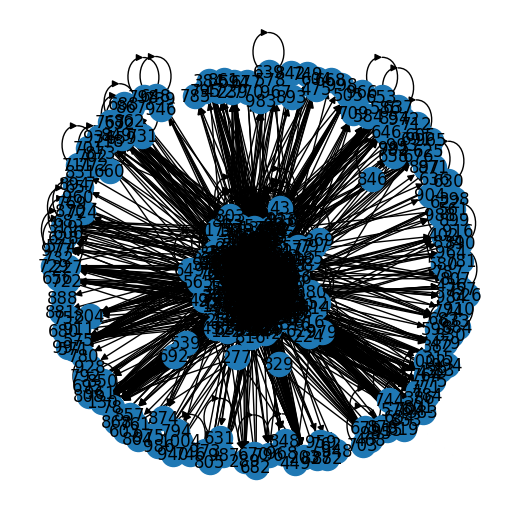

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

fig = plt.figure(figsize=(5, 5))  # Create a figure with 5x5 inch size
pos = nx.spring_layout(D)         # Calculate node positions using spring layout (assuming D is your graph)
nx.draw(D, pos, with_labels=True) # Draw the graph with node labels
plt.axis('off')                   # Turn off the axis
plt.tight_layout()                # Adjust the layout
plt.show()

In [34]:
print(D)

DiGraph with 1005 nodes and 25571 edges


In [27]:
degree_dict = nx.degree_centrality(D);

In [29]:
import operator
sorted_degree = sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True)
sorted_degree[:5]

[(160, 0.5438247011952191),
 (121, 0.37749003984063745),
 (107, 0.3715139442231076),
 (62, 0.36752988047808766),
 (86, 0.3545816733067729)]

In [30]:
betweenness_dict = nx.betweenness_centrality(D);
nx.closeness_dict = nx.closeness_centrality(D);
nx.eigenvector_dict = nx.eigenvector_centrality(D);

In [31]:
import operator
betweenness_dict = sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True)
betweenness_dict[:5]

[(160, 0.5438247011952191),
 (121, 0.37749003984063745),
 (107, 0.3715139442231076),
 (62, 0.36752988047808766),
 (86, 0.3545816733067729)]

In [32]:
closeness_dict = sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True)
closeness_dict[:5]

[(160, 0.5438247011952191),
 (121, 0.37749003984063745),
 (107, 0.3715139442231076),
 (62, 0.36752988047808766),
 (86, 0.3545816733067729)]

In [33]:
eigenvector_dict = sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True)
eigenvector_dict[:5]

[(160, 0.5438247011952191),
 (121, 0.37749003984063745),
 (107, 0.3715139442231076),
 (62, 0.36752988047808766),
 (86, 0.3545816733067729)]

In [35]:
nx.shortest_path = nx.shortest_path(D, source=160, target=62)
print(nx.shortest_path)

[160, 19, 62]


In [36]:
neighbors = list(D.neighbors(160))
len(neighbors)

334

In [37]:
neighbors

[161,
 28,
 23,
 187,
 190,
 113,
 263,
 405,
 18,
 284,
 362,
 300,
 180,
 45,
 321,
 61,
 319,
 338,
 314,
 17,
 42,
 367,
 377,
 106,
 280,
 41,
 320,
 133,
 478,
 81,
 453,
 51,
 237,
 165,
 104,
 4,
 153,
 495,
 147,
 233,
 114,
 103,
 393,
 35,
 467,
 430,
 337,
 336,
 135,
 576,
 361,
 446,
 136,
 380,
 474,
 258,
 557,
 397,
 58,
 417,
 318,
 401,
 173,
 250,
 242,
 150,
 145,
 323,
 163,
 128,
 130,
 80,
 251,
 352,
 441,
 212,
 394,
 748,
 55,
 179,
 343,
 641,
 90,
 181,
 685,
 298,
 342,
 249,
 89,
 68,
 63,
 481,
 356,
 132,
 482,
 78,
 345,
 184,
 189,
 468,
 224,
 278,
 129,
 340,
 520,
 294,
 368,
 142,
 44,
 270,
 611,
 486,
 375,
 296,
 183,
 681,
 509,
 69,
 388,
 541,
 201,
 232,
 562,
 667,
 236,
 404,
 138,
 216,
 349,
 376,
 730,
 20,
 400,
 21,
 116,
 79,
 428,
 2,
 87,
 426,
 329,
 171,
 127,
 672,
 210,
 115,
 169,
 166,
 786,
 292,
 269,
 137,
 379,
 548,
 164,
 316,
 326,
 448,
 281,
 158,
 285,
 381,
 820,
 170,
 214,
 828,
 47,
 65,
 262,
 333,
 206,
 435,

**Social Network analysis**

In [40]:
node_df = pd.read_csv('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv')
node_df.head()

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [41]:
edge_df = pd.read_csv('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv')
edge_df.head()

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [42]:
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

In [43]:
node_attr = node_df.set_index('Name').to_dict('index')
nx.set_node_attributes(G, node_attr)

In [45]:
G['George Keith']

AtlasView({'Robert Barclay': {}, 'Benjamin Furly': {}, 'Anne Conway Viscountess Conway and Killultagh': {}, 'Franciscus Mercurius van Helmont': {}, 'William Penn': {}, 'George Fox': {}, 'George Whitehead': {}, 'William Bradford': {}})

In [46]:
len(G['George Keith'])

8

In [47]:
G.nodes()

NodeView(('George Keith', 'Robert Barclay', 'Benjamin Furly', 'Anne Conway Viscountess Conway and Killultagh', 'Franciscus Mercurius van Helmont', 'William Penn', 'George Fox', 'George Whitehead', 'William Bradford', 'James Parnel', 'Stephen Crisp', 'Peter Collinson', 'John Bartram', 'James Logan', 'Joseph Wyeth', 'Thomas Ellwood', 'Alexander Skene of Newtyle', 'Lilias Skene', 'Dorcas Erbery', 'James Nayler', 'William Mucklow', 'William Dewsbury', 'Edward Burrough', 'John Crook', 'John Audland', 'John Camm', 'Francis Howgill', 'Edward Pyott', 'Charles Marshall', 'Anne Camm', 'Martha Simmonds', 'Richard Farnworth', 'William Crouch', 'Tace Sowle', 'John Bellers', 'Fettiplace Bellers', 'William Rogers', 'Hannah Stranger', 'Isabel Yeamans', 'George Fox the younger', 'Margaret Fell', 'Ellis Hookes', 'William Mead', 'Elizabeth Hooten', 'Thomas Salthouse', 'John Wilkinson', 'William Coddington', 'John Stubbs', 'John Perrot', 'Leonard Fell', 'William Caton', 'Samuel Fisher', 'John Burnyeat', '

In [48]:
len(G.nodes())

119

In [49]:
#Create a Python dict of key:values attributes by setting values in ‘Name’ column of the dataframe as the index column.
node_attr = node_df.set_index('Name').to_dict('index')

In [50]:
nx.set_node_attributes(G, node_attr)

In [51]:
G.nodes['George Keith']

{'Historical Significance': 'Quaker schismatic and Church of England clergyman',
 'Gender': 'male',
 'Birthdate': 1638,
 'Deathdate': 1716,
 'ID': 10006784,
 'degree': 0.06779661016949153,
 'closeness': 0.3254597908402452,
 'betweenness': 0.04500656400917155,
 'eigenvector': 0.18384690867915346}

In [62]:
# Degree centrality
degree_dict = nx.degree_centrality(G)

# Closeness centrality
closeness_dict = nx.closeness_centrality(G)

# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

# Eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)

# Assign measures as node attributes
nx.set_node_attributes(G, degree_dict, 'degree')
nx.set_node_attributes(G, closeness_dict, 'closeness')
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [55]:
# Sort nodes by degrees
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

In [63]:
# Sort nodes by degree centrality
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
top_person = sorted_degree[0]
print(f"Who has the highest number of friends? {top_person[0]} with degree centrality {top_person[1]}")

Who has the highest number of friends? George Fox with degree centrality 0.1864406779661017


In [64]:
# Sort nodes by betweenness centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)
gatekeeper = sorted_betweenness[0]
print(f"Who should work as the gatekeeper? {gatekeeper[0]} with betweenness centrality {gatekeeper[1]}")

Who should work as the gatekeeper? William Penn with betweenness centrality 0.23999456006192194


In [65]:
# Sort nodes by closeness centrality
sorted_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)
mediator = sorted_closeness[0]
print(f"Who could act as the mediator? {mediator[0]} with closeness centrality {mediator[1]}")

Who could act as the mediator? George Fox with closeness centrality 0.39222077357670576


In [66]:
# Sort nodes by eigenvector centrality
sorted_eigenvector = sorted(eigenvector_dict.items(), key=lambda x: x[1], reverse=True)
influential_friends = sorted_eigenvector[0]
print(f"Whose friends are mostly influential? {influential_friends[0]} with eigenvector centrality {influential_friends[1]}")

Whose friends are mostly influential? George Fox with eigenvector centrality 0.4491750710859923


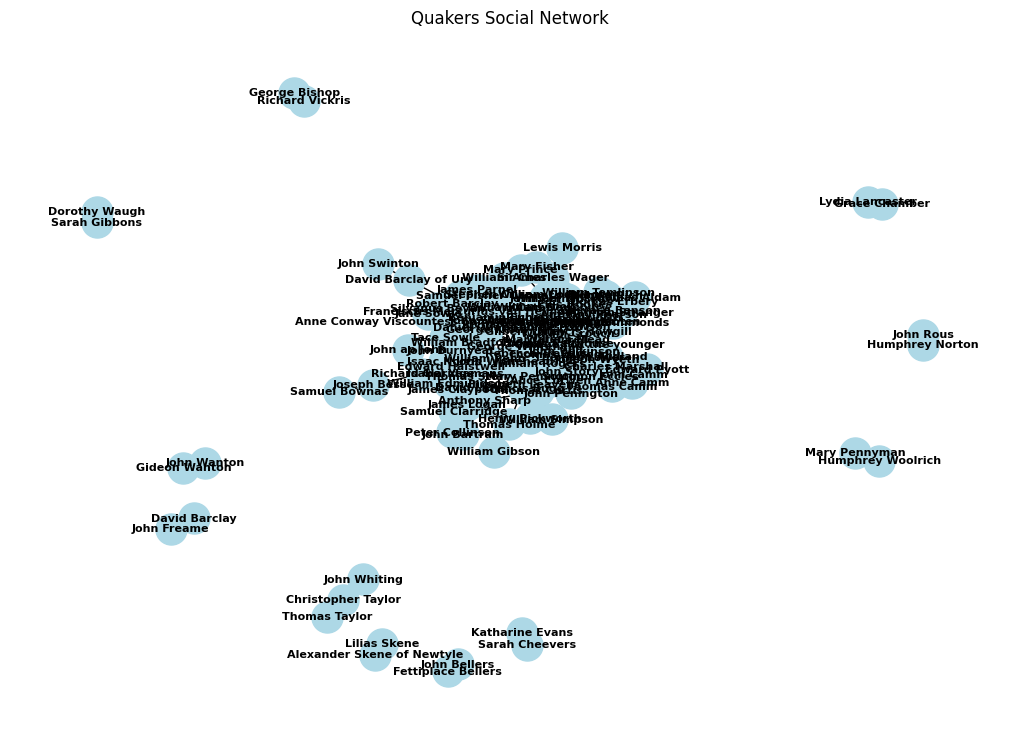

In [67]:
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Use spring layout for simplicity
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold')
plt.title("Quakers Social Network")
plt.show()

In [56]:
# Show top 20 nodes by degrees
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 0.1864406779661017)
('William Penn', 0.15254237288135594)
('James Nayler', 0.13559322033898305)
('George Whitehead', 0.11016949152542373)
('Margaret Fell', 0.11016949152542373)
('Benjamin Furly', 0.0847457627118644)
('Edward Burrough', 0.07627118644067797)
('George Keith', 0.06779661016949153)
('Thomas Ellwood', 0.06779661016949153)
('Francis Howgill', 0.059322033898305086)
('John Perrot', 0.059322033898305086)
('John Audland', 0.05084745762711865)
('Richard Farnworth', 0.05084745762711865)
('John Story', 0.05084745762711865)
('Alexander Parker', 0.05084745762711865)
('John Wilkinson', 0.0423728813559322)
('John Stubbs', 0.0423728813559322)
('William Caton', 0.0423728813559322)
('Anthony Pearson', 0.0423728813559322)
('Thomas Curtis', 0.0423728813559322)


In [58]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

In [59]:
#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192194 | Degree: 0.15254237288135594
Name: George Fox | Betweenness Centrality: 0.23683257726065213 | Degree: 0.1864406779661017
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 0.11016949152542373
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170327 | Degree: 0.11016949152542373
Name: James Nayler | Betweenness Centrality: 0.1044602628044609 | Degree: 0.13559322033898305
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167245 | Degree: 0.0847457627118644
Name: Thomas Ellwood | Betweenness Centrality: 0.04619062388510455 | Degree: 0.06779661016949153
Name: George Keith | Betweenness Centrality: 0.04500656400917155 | Degree: 0.06779661016949153
Name: John Audland | Betweenness Centrality: 0.041649363400775824 | Degree: 0.05084745762711865
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 0.05084745762711865
Name: John Story | Betweenness Centrality

In [61]:
import networkx as nx
import pandas as pd

# Assuming edge_df is loaded (e.g., quakers_edgelist.csv)
# edge_df = pd.read_csv("quakers_edgelist.csv")
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# Compute centrality measures
degree_dict = nx.degree_centrality(G)
closeness_dict = nx.closeness_centrality(G)
betweenness_dict = nx.betweenness_centrality(G)
eigenvector_dict = nx.eigenvector_centrality(G)

# Assign each measure to an attribute in the network graph, G
nx.set_node_attributes(G, degree_dict, 'degree')
nx.set_node_attributes(G, closeness_dict, 'closeness')
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

# Verify by displaying attributes of a node (e.g., 'George Fox' as in Page 15)
print(G.nodes['George Fox'])

{'degree': 0.1864406779661017, 'closeness': 0.39222077357670576, 'betweenness': 0.23683257726065213, 'eigenvector': 0.4491750710859923}
